In [31]:
import pandas as pd
from pandas import DataFrame
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
from scipy import stats
import seaborn as sns
from sklearn.neighbors import NearestNeighbors



# import data with user sessions info 
df = pd.read_csv('fact_user_session.csv')

# import data with channel info to associate information
df_channels = pd.read_csv('channel.csv')

# matplob style for graphs
style.use('dark_background')

In [35]:
# merge tables to get associated 'channel names' and 'channel ids'
df = pd.merge(df, df_channels, left_on=['CHANNEL_ID'],
     right_on=['Channel_id'],
     how='left')

# drop unnecesary columns from other channels dataframe
df.drop(columns = ['Active'], inplace = True) 

In [36]:
# remove NaN values for accuracy 
df= df[df['Channel_name'].notna()]

In [37]:
# get unique channels to perform anomaly detection for each case
channels = set(df['Channel_name'])
channels

{'Dajto', 'Óčko Star'}

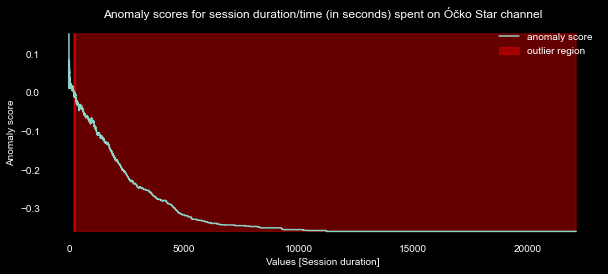

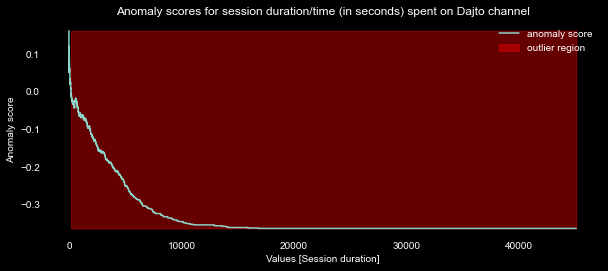

In [39]:
#(5) Anomaly detecton algorithm I: Univariate

# Trained Isolation Forest using the integer values ("Duration" feature) data
from sklearn.ensemble import IsolationForest

for channel in channels:
    # filter by channel
    df_c = df.loc[df["Channel_name"] == channel]

    # fit models
    isolation_forest = IsolationForest(n_estimators=100)
    isolation_forest.fit(df_c['DURATION'].values.reshape(-1, 1))

    # store in Numpy array to use it later
    xx = np.linspace(df['DURATION'].min(), df_c['DURATION'].max(), len(df_c)).reshape(-1,1)

    # calculate anomalies
    anomaly_score = isolation_forest.decision_function(xx)

    # list with 'labels'
    outlier = isolation_forest.predict(xx)

    # visualize
    plt.figure(figsize=(10,4))
    plt.plot(xx, anomaly_score, label='anomaly score')
    plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color = 'r', 
                     alpha=.4, label='outlier region')
    plt.legend()
    plt.ylabel('Anomaly score')
    plt.xlabel('Values [Session duration]')
    plt.title('Anomaly scores for session duration/time (in seconds) spent on {channel_name} channel'.format(channel_name = channel))
    plt.savefig('t3_deliverable01.png') #save graphic as an image
    plt.show();

In [ ]:
"""
IMPORTANT QUESTIONS:
1. How are each outliers contrasting each other?
2. What could be considered as a "unusual" duration per session and why (per channel)?
"""